In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

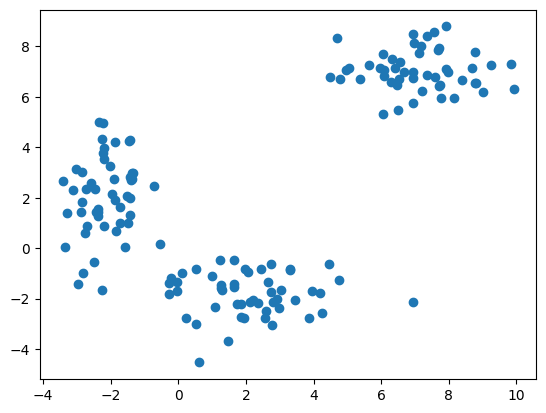

In [2]:
mean1 = [-2, 2]
cov1 = [[0.5, 0], [0, 2]]
data1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2 = [2, -2]
cov2 = [[2, 0], [0, 0.5]]
data2 = np.random.multivariate_normal(mean2, cov2, 50)

mean3 = [7, 7]
cov3 = [[2, 0], [0, 0.5]]
data3 = np.random.multivariate_normal(mean3, cov3, 50)

data = np.concatenate((data1, data2, data3), axis=0)

plt.scatter(data[:, 0], data[:, 1])
plt.show()


In [3]:
def GMM(X, k=2, num_iterations=5):
    m, n = X.shape
    phi = np.full(shape=k, fill_value=1/k)
    mu = [X[j,:] for j in np.random.choice(m, size=k, replace=False)]
    sigma = [np.cov(X.T) for j in range(k)]

    for iteration in range(num_iterations):
        # E-step
        likelihood = np.zeros((m, k))
        for j in range(k):
            distribution = multivariate_normal(mean=mu[j], cov=sigma[j])
            likelihood[:,j] = distribution.pdf(X)
        
        numerator = likelihood*phi
        denominator = np.sum(numerator, axis=1, keepdims=True)
        w = numerator/denominator

        # M-step
        phi = np.mean(w, axis=0)
        for j in range(k):
            mu[j] = np.sum(w[:,[j]]*X, axis=0) / np.sum(w[:,j])
            sigma[j] = np.matmul((w[:,[j]]*(X-mu[j])).T, (X-mu[j])) / np.sum(w[:,j])

    # Predict
    likelihood = np.zeros((m, k))
    for j in range(k):
        distribution = multivariate_normal(mean=mu[j], cov=sigma[j])
        likelihood[:,j] = distribution.pdf(X)
    
    numerator = likelihood*phi
    denominator = np.sum(numerator, axis=1, keepdims=True)
    w = numerator/denominator
    prediction = np.argmax(w, axis=1)

    return prediction, denominator, mu, sigma

In [4]:
prediction, denominator, mu, sigma = GMM(data, k=3, num_iterations=50)

In [5]:
for i in range(len(denominator)):
    if denominator[i] < 2e-3:
        prediction[i] = 100

C:\Users\Minh\AppData\Local\Temp\ipykernel_22316\573124518.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=prediction, cmap=plt.cm.get_cmap('brg'))


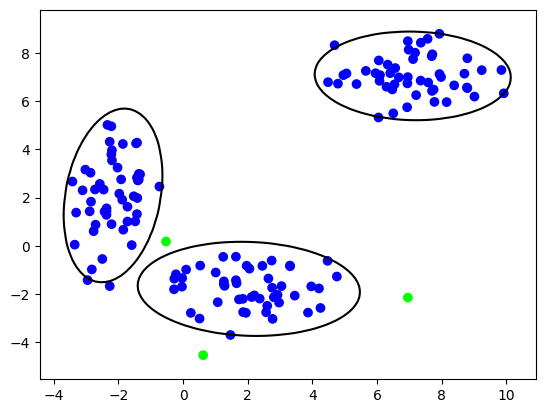

In [6]:
def plot_gmm(X, mu, sigma):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    probabilities = np.zeros((len(grid), len(mu)))
    for j in range(len(mu)):
        distribution = multivariate_normal(mean=mu[j], cov=sigma[j])
        probabilities[:, j] = distribution.pdf(grid)
    probabilities = probabilities.reshape(xx.shape[0], xx.shape[1], len(mu))

    plt.scatter(data[:, 0], data[:, 1], c=prediction, cmap=plt.cm.get_cmap('brg'))
    for j in range(len(mu)):
        plt.contour(xx, yy, probabilities[:,:,j], levels=[0.01], colors='black')

    plt.show()

plot_gmm(data, mu, sigma)